Alejandro Serrano
Grupo: 202016908_87
Tutora:
Angela Bibiana Ortegon

Cu:so
Análisis De D
noviembre 2024atos


# Agrupamiento en Hierarchical Clustering

#  1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.



In [89]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')


In [115]:
# Cargar el conjunto de datos en la variable data
import pandas as pd

data = pd.read_csv('C:\\1Mall_Customers.csv')
#Tipo de objeto: El DataFrame data es un objeto de la clase pandas.core.frame.DataFrame.




In [109]:
# Realizamos lectura de los Datos para el análisis exploratorio
data.head(30)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [111]:
# Descripción de los datos
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [107]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


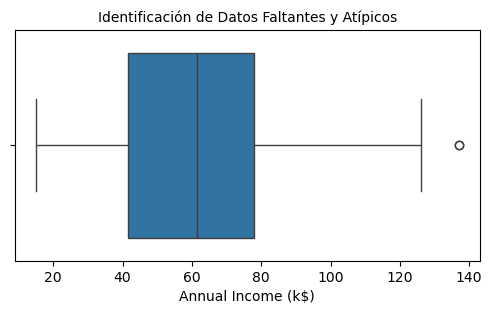

In [117]:
#Ingresos anuales (k$)
#Identificación de Datos Faltantes y Atípicos

# Generar el gráfico de caja para identificar datos atípicos en 'Annual Income (k$)'
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)
plt.show()

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
Identificar datos Faltantes

In [120]:
# Identificar columnas con datos faltantes
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Eliminar filas con datos faltantes: Puedes eliminar las filas o columnas con valores faltantes si son pocas y no impactan significativamente el análisis. data_clean = data.dropna()

Rellenar valores faltantes con la media de la columna Rellenar los valores faltantes con un valor como la media, mediana, o moda de la columna.

data['columna'] = data['columna'].fillna(data['columna'].mean())

Imputación avanzada: Usar técnicas más sofisticadas como KNN o modelos de regresión para predecir los valores faltantes. Técnicas adicionales:
Interpolación: Puedes usar la interpolación para llenar los valores faltantes en series temporales. data['columna'] = data['columna'].interpolate()

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

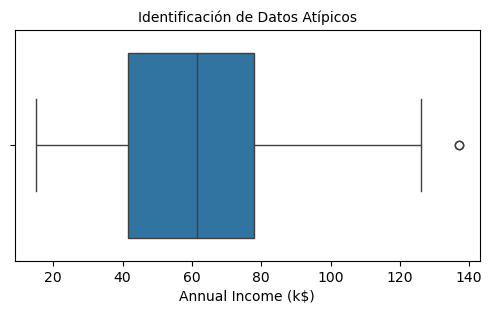

In [123]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [125]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Annual Income (k$)']<nivel_minimo)|(data['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 14


In [129]:
# Filtra Datos Atípicos Ingresos anuales (k$)

# Filtra Datos Atípicos

Datos=data[(data['Annual Income (k$)']<nivel_maximo)&(data['Annual Income (k$)']>nivel_minimo)]

In [131]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [138]:
# Seleccionar características relevantes
# Demográficas
Datos['Gender'] = Datos['Gender'].apply(lambda x: 1 if x == 'Male' else 0)  # Codificación binaria de género

# Renombrar columnas para simplificar
Datos = Datos.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'})

# Filtrar columnas relevantes para el modelo
# Selección de características demográficas y de comportamiento
selected_features = Datos[['Age', 'Annual_Income', 'Spending_Score', 'Gender']]

# Mostrar las primeras filas del dataset preparado
selected_features.head()


,Age,Annual_Income,Spending_Score,Gender
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [142]:
# Revisión de los datos de las variables objetivo
Datos.head(40)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,0,64,19,3
9,10,0,30,19,72


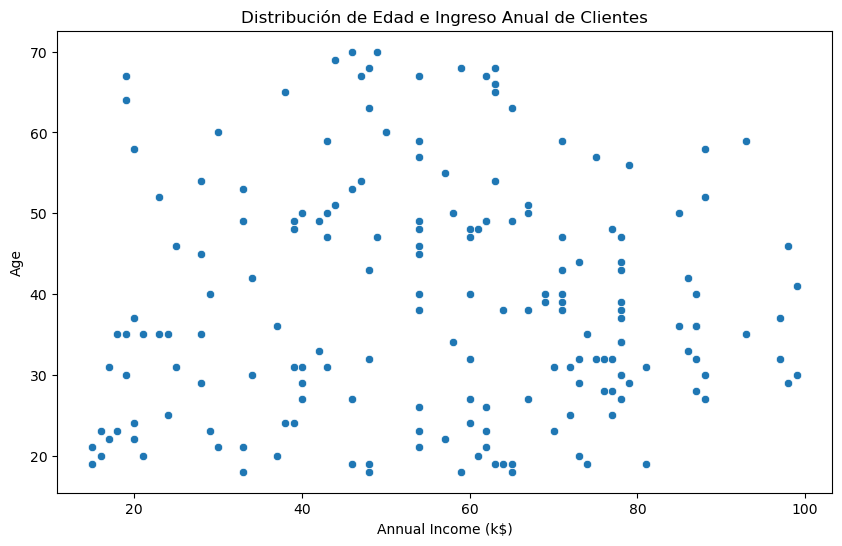

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica antes del agrupamiento
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data['Annual_Income'], y=filtered_data['Age'])
plt.title('Distribución de Edad e Ingreso Anual de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()


4. Entrenar el modelo configurando los diferentes hiperparámetros

In [147]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Escalador
scaler = StandardScaler()

# Estandarizar las columnas seleccionadas
scaled_data = scaler.fit_transform(filtered_data)

# Convertir a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=filtered_data.columns)

# Mostrar las primeras filas del DataFrame escalado
print(scaled_df.head())


        Age  Annual_Income  Spending_Score    Gender
0 -1.397567      -1.876580       -0.445738  1.113986
1 -1.257773      -1.876580        1.210043  1.113986
2 -1.327670      -1.831344       -1.746710 -0.897678
3 -1.117978      -1.831344        1.052350 -0.897678
4 -0.558801      -1.786107       -0.406315 -0.897678


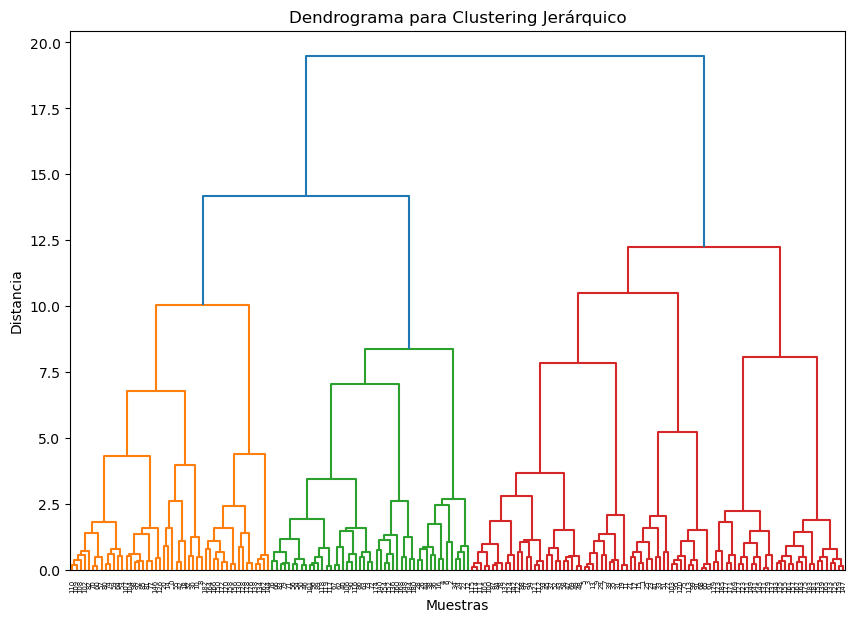

In [149]:
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de que no haya valores no finitos en los datos escalados
scaled_data = np.nan_to_num(scaled_data)

# Realizar el enlace jerárquico utilizando el método de Ward
linked = linkage(scaled_data, method='ward')

# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()


In [151]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Reemplazar valores faltantes con la media (si los hubiera)
filtered_data = filtered_data.fillna(filtered_data.mean())

# Escalado de los datos (ya realizado anteriormente)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Entrenar el modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Número de clústeres = 3
labels = model.fit_predict(scaled_data)

# Evaluación del modelo
# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score:.2f}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score:.2f}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score:.2f}")


Coeficiente de Silhouette: 0.24
Índice de Calinski-Harabasz: 58.38
Índice de Davies-Bouldin: 1.36


6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

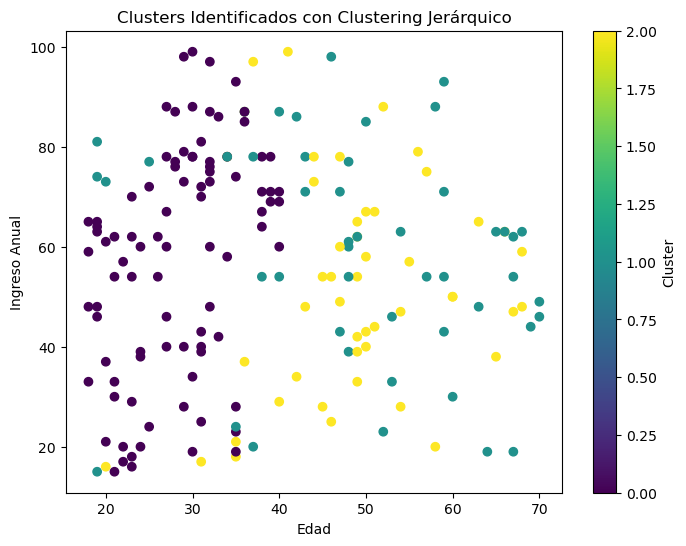

In [154]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=3)  # Ajustar el número de clusters
filtered_data['Cluster'] = model.fit_predict(scaled_data)

# Graficar los clusters en un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['Age'], filtered_data['Annual_Income'], c=filtered_data['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual')
plt.colorbar(label='Cluster')
plt.show()


Gráfico de Silueta
Este gráfico muestra cuán similar es cada punto a su propio grupo en comparación con otros grupos. Un valor alto (cercano a 1) indica que los puntos están bien agrupados, mientras que un valor bajo (cercano a -1) indica que están mal asignados.

Silhouette Score: 0.24067033365432652


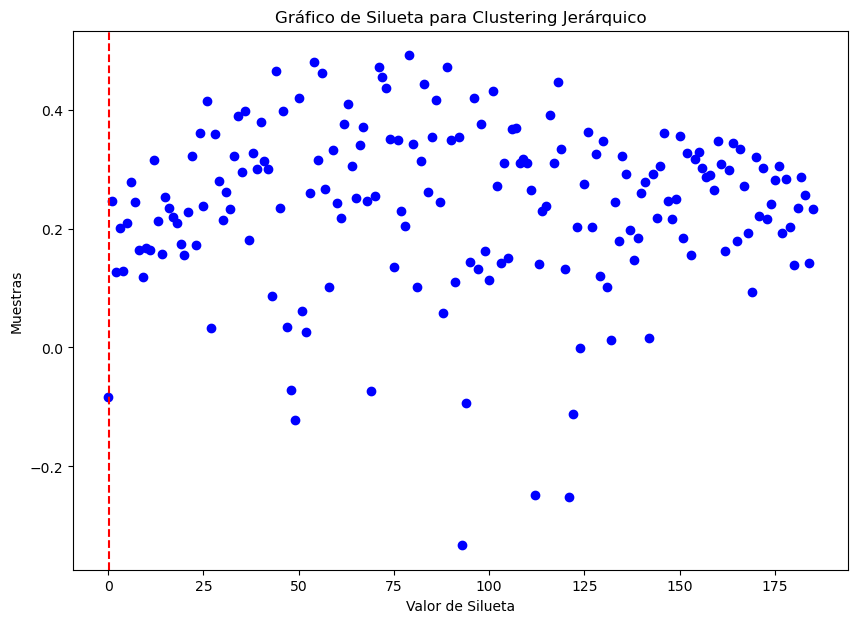

In [157]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()